/var/folders/l3/yp6xfgb93qbbxl9ldtd69syh0000gn/T/ipykernel_5893/751328620.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(ds.astype(np.int))


Episode: 0, Average Reward: -500.0
Episode: 100, Average Reward: -500.0
Episode: 200, Average Reward: -492.2
Episode: 300, Average Reward: -481.72
Episode: 400, Average Reward: -465.44
Episode: 500, Average Reward: -456.74
Episode: 600, Average Reward: -422.6
Episode: 700, Average Reward: -355.44
Episode: 800, Average Reward: -335.24
Episode: 900, Average Reward: -317.74
Episode: 1000, Average Reward: -312.16
Episode: 1100, Average Reward: -325.5
Episode: 1200, Average Reward: -314.6
Episode: 1300, Average Reward: -274.17
Episode: 1400, Average Reward: -241.42
Episode: 1500, Average Reward: -242.92
Episode: 1600, Average Reward: -292.79
Episode: 1700, Average Reward: -281.83
Episode: 1800, Average Reward: -217.1
Episode: 1900, Average Reward: -186.71
Episode: 2000, Average Reward: -182.99
Episode: 2100, Average Reward: -204.23
Episode: 2200, Average Reward: -189.59
Episode: 2300, Average Reward: -193.56
Episode: 2400, Average Reward: -165.09
Episode: 2500, Average Reward: -191.11
Episo

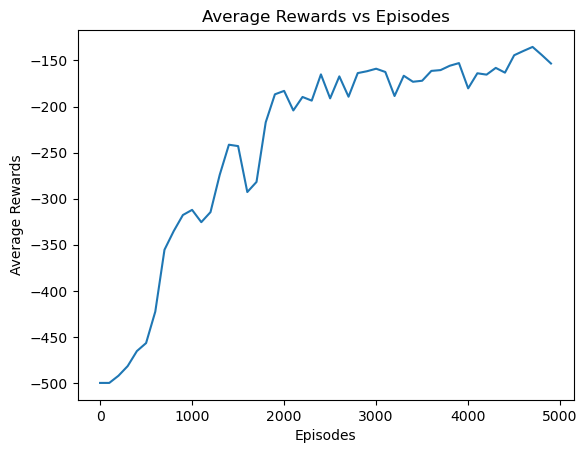

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MountainCarEnv import MountainCarEnv
import pickle

def discrete_state(state):
    ds = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(ds.astype(np.int))

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.95
num_episodes = 5000
display_interval = 100
discrete_size = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_size

# Exploration settings
eps = 0.7
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards = []
avg_rewards = []

for ep in range(num_episodes):
    ds = discrete_state(env.reset())
    finished = False
    ep_rewards = 0

    while not finished:
        if np.random.random() > eps:
            act = np.argmax(q_table[ds])
        else:
            act = np.random.randint(0, env.action_space.n)

        next_state, rew, finished, _ = env.step(act)
        ep_rewards += rew
        next_ds = discrete_state(next_state)

        if not finished:
            max_next_q = np.max(q_table[next_ds])
            current_q = q_table[ds + (act,)]
            updated_q = (1 - lr) * current_q + lr * (rew + gamma * max_next_q)
            q_table[ds + (act,)] = updated_q
        elif next_state[0] >= env.goal_position:
            q_table[ds + (act,)] = 0

        ds = next_ds

    rewards.append(ep_rewards)

    if end_eps_decay >= ep >= start_eps_decay:
        eps -= eps_decay_val

    if ep % display_interval == 0:
        avg_reward = np.mean(rewards[-display_interval:])
        avg_rewards.append(avg_reward)
        print(f"Episode: {ep}, Average Reward: {avg_reward}")

env.close()
with(open('mountain_car_q_learn.pkl', 'wb')) as q_file:
    pickle.dump(q_table, q_file)

plt.plot(np.arange(0, num_episodes, display_interval), avg_rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [11]:
env = MountainCarEnv(render_mode="human")

TEST_EPISODES = 5

for episode in range(TEST_EPISODES):
    discrete_state_var = discrete_state(env.reset())
    done = False
    step = 0

    print(f"Test Episode {episode + 1}")

    while not done:
        # Obtener la mejor acción según la tabla Q
        action = np.argmax(q_table[discrete_state_var])

        # Realizar la acción y obtener el nuevo estado, recompensa y si el episodio ha terminado
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = discrete_state(new_state)

        # Renderizar el entorno
        env.render()

        # Actualizar el estado discreto para el siguiente paso
        discrete_state_var = new_discrete_state
        step += 1

    print(f"Episode {episode + 1} finished in {step} steps")
env.close()


/var/folders/l3/yp6xfgb93qbbxl9ldtd69syh0000gn/T/ipykernel_5893/751328620.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(ds.astype(np.int))


Test Episode 1
Episode 1 finished in 152 steps
Test Episode 2
Episode 2 finished in 156 steps
Test Episode 3
Episode 3 finished in 110 steps
Test Episode 4
Episode 4 finished in 112 steps
Test Episode 5
Episode 5 finished in 150 steps
